This notebook makes galactic plane top-down projection plots of all of the position matches I get from dr2 and dr3

In [1]:
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import astropy.coordinates as coord
import qtpy

%matplotlib inline

In [2]:
center = SkyCoord(ra= '17h45m39.60213s', dec='-29d00m22.00s', distance= 8.122*u.kpc, frame= 'icrs')
center_gc = center.galactic
center_gc_cart = center_gc.cartesian
center_gc_cart

<CartesianRepresentation (x, y, z) in kpc
    (8.12199385, -0.00781428, -0.00622558)>

In [9]:
f = open('temp.csv', 'r')
first_time = True
ras = []
ra_err = []
decs = []
dec_err = []
dists = []
dist_err = []
for line in f:
    values = line.split(',')
    if float(values[10]) < 0:
        continue
    else:
        if first_time:
            ras.insert(0,float(values[6])*u.degree)
            ra_err.insert(0,float(values[7])*u.degree)
            decs.insert(0, float(values[8])*u.degree)
            dec_err.insert(0, float(values[9])*u.degree)
            dists.insert(0, 1. / float(values[10])*u.kpc)
            dist_err.insert(0, (float(values[11]) / (float(values[10])**2))*u.kpc)
            first_time = False
        else: 
            ras.append(float(values[6])*u.degree)
            ra_err.append(float(values[7])*u.degree)
            decs.append(float(values[8])*u.degree)
            dec_err.append(float(values[9])*u.degree)
            dists.append(1. / float(values[10])*u.kpc)
            dist_err.append((float(values[11]) / (float(values[10])**2))*u.kpc)


In [10]:
sc = SkyCoord(ras, decs, distance= dists)
scg = sc.galactic
scg_cart = scg.cartesian / u.kpc
# positions of the dr2 matches in cartesian coordinates, excluding those with negative parallaxes 
scg_cart

sc_err = SkyCoord(ra_err, dec_err, distance= dist_err)
scg_err = sc_err.galactic
scg_err_cart = scg_err.cartesian / u.kpc
# positions of the dr2 matches in cartesian coordinates, excluding those with negative parallaxes 

for i in range(len(scg_err_cart.x)):
    if scg_err_cart.x[i] < 0:
        scg_err_cart.x[i] = np.abs(scg_err_cart.x[i])
    
scg_err_cart

<CartesianRepresentation (x, y, z) [dimensionless]
    [(0.02736142, 0.22844402, -0.39987602),
     (0.23913317, 1.62063879, -2.83858848),
     (0.00068431, 0.00488097, -0.00844559),
     (0.01439718, 0.11690308, -0.20405605),
     (0.01539916, 0.13281172, -0.23315787),
     (0.05957457, 0.43846034, -0.75872098),
     (0.02493994, 0.21326685, -0.37452706),
     (0.00976539, 0.08708952, -0.1528704 ),
     (0.0823772 , 0.72436546, -1.2714247 ),
     (0.02391507, 0.20493281, -0.35911717),
     (0.28021491, 2.48495361, -4.36272483),
     (0.43263152, 3.51817519, -6.17245643),
     (0.20238909, 1.54029889, -2.70346168),
     (0.02036621, 0.14236641, -0.2492055 ),
     (0.00263291, 0.02329278, -0.0408814 ),
     (0.18395588, 1.5670204 , -2.7439931 ),
     (0.03104249, 0.26423725, -0.46242613),
     (0.00389779, 0.03473138, -0.06094969),
     (0.08541568, 0.72127108, -1.26456837),
     (0.02732899, 0.22481372, -0.39450544)]>

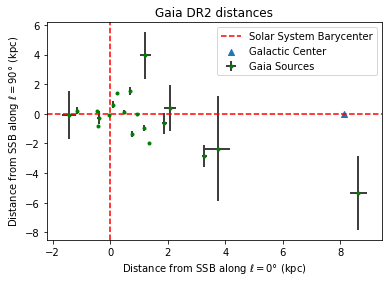

In [11]:
fig = plt.figure()
ax = fig.add_subplot()

#ax.scatter(0,0, label='Solar System Barycenter', c= 'r', marker= '^') # solar system barycenter
ax.errorbar(scg_cart.x, scg_cart.y, yerr= scg_err_cart.y, xerr= scg_err_cart.x, fmt= 'g.', ecolor= 'black', label='Gaia Sources')
ax.scatter(center_gc_cart.x, center_gc_cart.y, label='Galactic Center', marker = '^')
ax.axvline(0, color= 'r', linestyle= '--', label = 'Solar System Barycenter')
ax.axhline(0, color= 'r', linestyle= '--')


ax.set_title('Gaia DR2 distances')
ax.set_xlabel('Distance from SSB along '+r'$ \ell = 0 \degree$' + ' (kpc)')
ax.set_ylabel('Distance from SSB along '+r'$ \ell = 90 \degree$' + ' (kpc)')
ax.legend()

fig.savefig('/home/annika_deutsch/Binary-Pulsar-Distances/dr2proj.pdf')

#sc_err.dec / u.deg
#sc_err.ra / u.deg

In [12]:
# do the same for the dr3 matches
f = open('tempdr3.csv', 'r')
first_time = True
ras3 = []
ra3_err = []
decs3 = []
dec3_err = []
dists3 = []
dist3_err = []
for line in f:
    values = line.split(',')
    if values[6] != '':
        if float(values[6]) < 0:
            continue
        else:
            if first_time:
                ras3.insert(0,float(values[2])*u.degree)
                ra3_err.insert(0,float(values[3])*u.degree)
                decs3.insert(0, float(values[4])*u.degree)
                dec3_err.insert(0,float(values[5])*u.degree)
                dists3.insert(0, 1. / float(values[6])*u.kpc)
                dist3_err.insert(0,(float(values[7]) / (float(values[6])**2))*u.kpc)
                first_time = False
            else: 
                ras3.append(float(values[2])*u.degree)
                ra3_err.append(float(values[3])*u.degree)
                decs3.append(float(values[4])*u.degree)
                dec3_err.append(float(values[5])*u.degree)
                dists3.append(1. / float(values[6])*u.kpc)
                dist3_err.append((float(values[7]) / (float(values[6])**2))*u.kpc)


In [13]:
sc3 = SkyCoord(ras3, decs3, distance= dists3)
scg3 = sc3.galactic
scg_cart3 = scg3.cartesian / u.kpc
# positions of the dr3 matches in cartesian coordinates, excluding those with negative parallaxes 
scg_cart3

sc3_err = SkyCoord(ra3_err, dec3_err, distance= dist3_err)
scg3_err = sc3_err.galactic
scg3_err_cart = scg3_err.cartesian / u.kpc
# positions of the dr2 matches in cartesian coordinates, excluding those with negative parallaxes 

for i in range(len(scg3_err_cart.x)):
    if scg3_err_cart.x[i] < 0:
        scg3_err_cart.x[i] = np.abs(scg3_err_cart.x[i])
    
scg3_err_cart

<CartesianRepresentation (x, y, z) [dimensionless]
    [(0.03866861, 0.3291106 , -0.57657496),
     (0.00569963, 0.04726624, -0.08273297),
     (0.00842577, 0.07408888, -0.12999599),
     (0.1156719 , 0.9153201 , -1.59536981),
     (0.43875061, 3.48671095, -6.0997848 ),
     (0.03377904, 0.2935069 , -0.51527745),
     (0.00372898, 0.03344608, -0.0587215 ),
     (0.06742776, 0.59758088, -1.04895175),
     (0.02598396, 0.22546164, -0.39504869),
     (0.36469707, 3.24283273, -5.69226801),
     (0.0468377 , 0.38455876, -0.67410266),
     (0.01665424, 0.12185102, -0.21394673),
     (0.00214707, 0.01907206, -0.03348419),
     (0.11686891, 1.01221629, -1.77471104),
     (0.04329096, 0.37218325, -0.65169029),
     (0.06845017, 0.53129321, -0.92747241),
     (0.06773077, 0.47877323, -0.83032254),
     (0.00266953, 0.02390854, -0.04197193),
     (0.0400488 , 0.34359684, -0.60266213),
     (0.03747874, 0.31706653, -0.55573583)]>

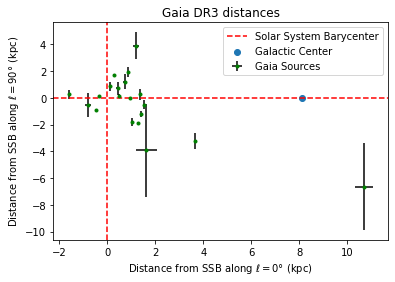

In [14]:
fig = plt.figure()
img = plt.imread('/home/annika_deutsch/Binary-Pulsar-Distances/Binary_Pulsar_Distances/milkywayartist.jpg')
ax = fig.add_subplot()

#ax.imshow(img, extent=[-2, 11, -7, 4])

ax.errorbar(scg_cart3.x, scg_cart3.y, yerr= scg3_err_cart.y, xerr= scg3_err_cart.x, fmt= 'g.', ecolor= 'black', label='Gaia Sources')
#ax.scatter(0,0, label='Solar System Barycenter') # solar system barycenter
ax.scatter(center_gc_cart.x, center_gc_cart.y, label='Galactic Center')
ax.axvline(0, color= 'r', linestyle= '--', label = 'Solar System Barycenter')
ax.axhline(0, color= 'r', linestyle= '--')


ax.set_title('Gaia DR3 distances')
ax.set_xlabel('Distance from SSB along '+r'$ \ell = 0 \degree$' + ' (kpc)')
ax.set_ylabel('Distance from SSB along '+r'$ \ell = 90 \degree$' + ' (kpc)')
ax.legend()

fig.savefig('/home/annika_deutsch/Binary-Pulsar-Distances/dr3proj.pdf')
